Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

### Задания 
<ol>
<li>Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.</li>
<li>Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.</li>
<li>На каких платформах произошло больше всего релизов?</li>
<li>Игры каких издателей (Publisher) встречаются в датасете чаще всего?</li>
<li>В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)</li>
<li>Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.</li>
<li>Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?</li>
</ol>
    
#### Описание данных
* Имеются следующие поля:
* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(
     font_scale=1,
     style="whitegrid",
     rc={'figure.figsize':(20,7)}
         )

In [3]:
# Load and look at the data
df = pd.read_csv('games.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
# Print the descriptive characteristics of the 'Year' variable
# and plot the distribution of the number of released games by year.

In [9]:
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [10]:
df['Year'] = df['Year'].astype('int')

<AxesSubplot:xlabel='Year', ylabel='count'>

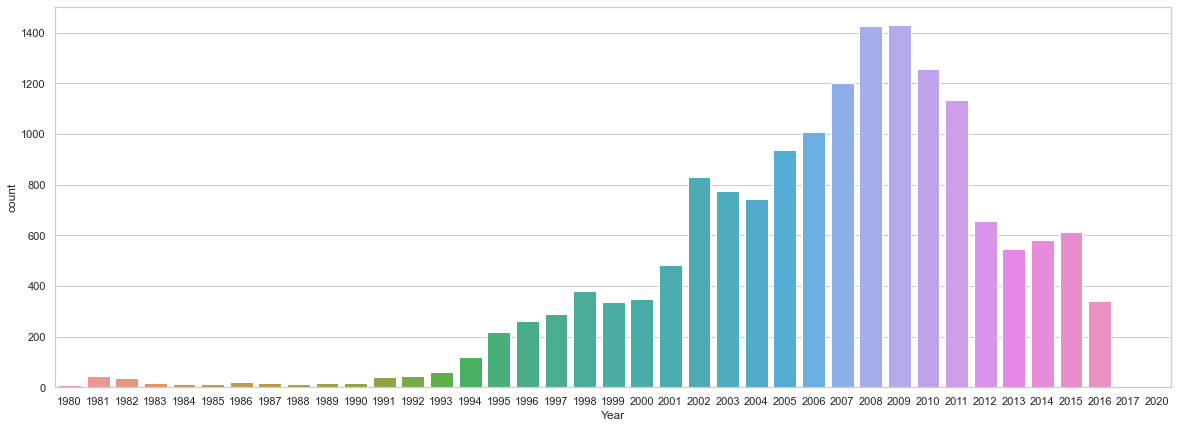

In [11]:
sns.countplot(x='Year', data=df)

In [12]:
# Which platforms have the most releases?

In [13]:
df['Year'].mode()

0    2009
dtype: int32

In [14]:
# Let's see the names of only those platforms whose frequency of occurrence is more than 7%.
# We indicate the values in descending order of frequency of occurrence, separated by commas with a space.

In [15]:
df['Platform'].value_counts(normalize=True)[df['Platform'].value_counts(normalize=True) > 0.07].index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype='object')

In [16]:
# Let's see the games of which publishers (Publisher) are most often found in the dataset.

In [17]:
df['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [18]:
# Let's focus on games from Nintendo. Let's calculate the mean, median
# and standard deviation for the sales of games from this publisher
# in different regions (NA, EU, JP, Other).

In [19]:
df.query('Publisher == "Nintendo"').loc[:, 'NA_Sales':].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767,2.563836
std,2.989913,1.743953,1.063110,0.464170,5.676925
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.010000,0.007500,0.090000,0.000000,0.300000
50%,0.375000,0.120000,0.280000,0.030000,0.920000
75%,0.972500,0.482500,0.740000,0.090000,2.262500
max,41.490000,29.020000,10.220000,8.460000,82.740000


In [20]:
# Now let's look at Nintendo sales in Japan by genre. Let's build a boxplot where:
# the x-axis will be the genre of the game (Genre)
# on the y-axis - sales in Japan (JP_sales)

In [21]:
jp_nintendo = df.query('Publisher == "Nintendo"')

<Figure size 1152x1152 with 0 Axes>

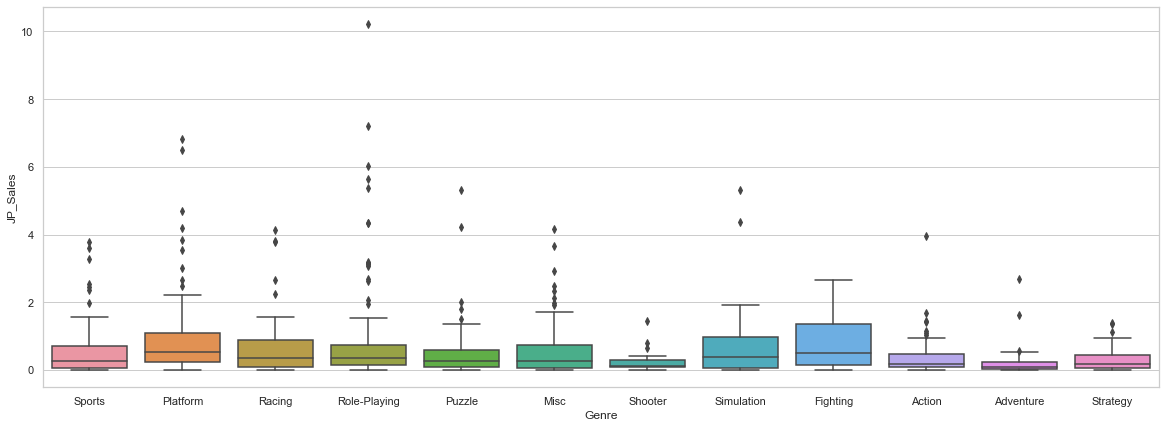

<Figure size 1152x1152 with 0 Axes>

In [22]:
sns.boxplot(x='Genre', y='JP_Sales', data=jp_nintendo)
plt.figure(figsize=(16,16))

In [23]:
# We visualize the dynamics of changes in the volume of global sales (Global_Sales)
# by years for Nintendo games of the following genres:
# Fighting, Simulation, Platform, Racing, Sports.

In [24]:
genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']

In [25]:
sales = df.query('Publisher == "Nintendo" and Genre in @genres') \
            .groupby(['Year', 'Genre'], as_index=False) \
            .agg({'Global_Sales':'sum'})

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

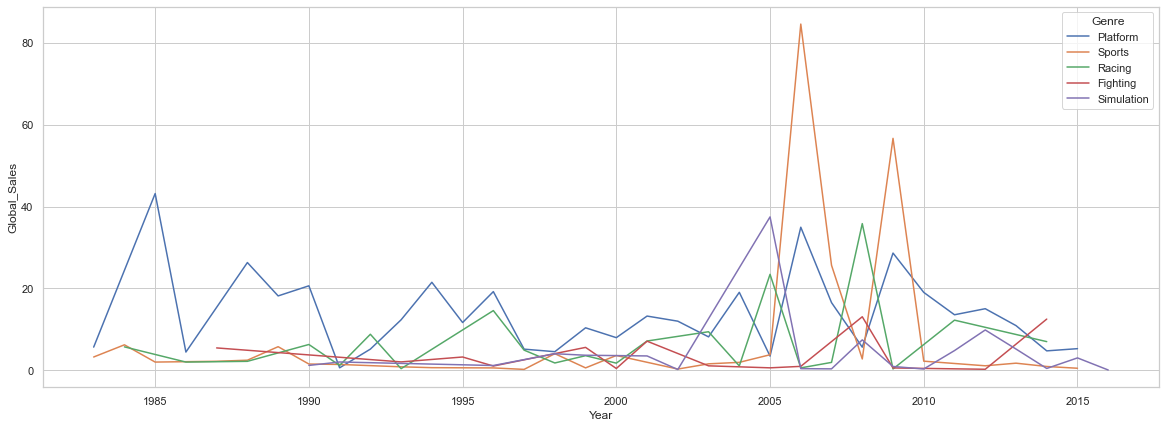

In [26]:
sns.lineplot(x='Year', y='Global_Sales', data=sales, hue='Genre')